# ***Imports And Constants***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline     
from statistics import *
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
sns.set(color_codes=True)
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn import svm
from  sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import threading
from threading import Thread



In [ ]:
# CONSTANTS
DataPath_Train= 'training.csv'
DataPath_Validation= 'validation.csv'

# **Load Data**


In [ ]:
class Load :

  def __init__(self, DataPath_Train, DataPath_Validation):
    self.DataPath_Train = DataPath_Train
    self.DataPath_Validation = DataPath_Validation
    


  def Load_Data(self):
    #Train 
    Train = pd.read_csv(self.DataPath_Train, sep=";",decimal=',')
    Target_Train = self.Feature_Encoder_Target(Train,Train['classLabel'])
    del (Train['classLabel'] )
    Train['classLabel'] = Target_Train
    #Valid 
    Validation =  pd.read_csv(self.DataPath_Validation, sep=";",decimal=',')
    Target_Validation = self.Feature_Encoder_Target(Validation,Validation['classLabel'])
    del (Validation['classLabel'] )
    Validation['classLabel'] = Target_Train



    return Train ,Validation 

    

  def Feature_Encoder_Target(self,DataSet,colName):
    Target = pd.Series(np.where(colName.values == 'yes.', 1, 0),
            DataSet.index)
    return Target



      

# ***Analysis Data***

**Steps For EDA :**
1.   Importing the libraries  (DONE Above )
2.   Loading data  (DONE Above)
3.   Checking  types of data
4.   Dropping  missing or null values
5.   Dropping irrelevant columns
6.   Dropping the duplicate rows
7.   Visualize Data





***3-Checking types of data***

In [ ]:
class Analysis_Data:

  def __init__(self, Train, Valid):

    self.Train = Train
    self.Valid = Valid

  def Show(self):

    print("\t\t\t\t\t\t Train Head\t\t\t\t\t \n ",self.Train.head(5))
    print("\t\t\t\t\t\t Train Tail\t\t\t\t\t  \n ",self.Train.tail(5))
    print("\t\t\t\t\t\t Types \t\t\t\t\t  \n ",self.Train.dtypes)
    print("\t\t\t\t\t\t Valid Head\t\t\t\t\t \n ",self.Valid.head(5))
    print("\t\t\t\t\t\t Valid Tail\t\t\t\t\t  \n ",self.Valid.tail(5))
  def Check_NAN(self , Dataset): 
    for col in Dataset.columns :
      col ,Dataset[col].isnull().values.any()
    return (Dataset.isna().sum()) 

  def Runall_Analysis(self):
    self.Show()
    Train_NAN = self.Check_NAN(self.Train)
    print("\t\t\t\t\t\t Train Nan Checker \t\t\t\t\t \n ",Train_NAN)
    Test_NAN = self.Check_NAN(self.Valid)
    print("\t\t\t\t\t\t Valid Nan Checker \t\t\t\t\t \n ",Test_NAN)



***Handle Missing Data :***

First Remove Var18 ---- >Has Many Nan

Fill Missing Data **Numeric** with Mean.

Fill Missing Data **Categorical** With Mode .  

In [ ]:
class Missing_Data:
  def __init__(self, Train, Valid):
    self.Train = Train
    self.Valid = Valid

  # First Remove Var18 ---- >Has Many Nan
  def Remove_More_Nan_Col(self):
    Train = self.Train.drop([ 'variable18'], axis=1)
    Valid = self.Valid.drop([ 'variable18'], axis=1)
    return Train,Valid 



  def Fill_Numeric_NAN(self , DataSet):
    Numeric_Col_List = DataSet.select_dtypes(np.number)
    for i in Numeric_Col_List:
      DataSet[i] =DataSet[i].fillna(value=DataSet[i].mean())


    return DataSet




  def Fill_categorical_NAN(self,DataSet):
    categorical_Col_List= DataSet.select_dtypes(np.object)

    for i in categorical_Col_List:
      DataSet[i] =DataSet[i].fillna(value=DataSet[i].mode()[0])


    return DataSet


  def Runall_MissingData(self):
    Train , Valid = self.Remove_More_Nan_Col()
    Train = self.Fill_Numeric_NAN(Train)
    Valid = self.Fill_Numeric_NAN(Valid)
    Train = self.Fill_categorical_NAN(Train)
    Valid = self.Fill_categorical_NAN(Valid)
    return Train , Valid 










# ***Preprocessing Data***




In [ ]:
#Convert Categorical Data To Lable encoder

In [ ]:
class Preprocessing_Data:

  def __init__(self, Train, Valid):
    self.Train = Train
    self.Valid = Valid

  def LableEncoding_For_Cat(self,DataSet):
      categorical_Col_List= DataSet.select_dtypes(np.object)
      le = LabelEncoder() 
      for i in categorical_Col_List:
        DataSet[i]= le.fit_transform(DataSet[i]) 
      return DataSet
      
  def Split_X_Y(self,DataSet):
    Y_DataSet = DataSet.classLabel
    DataSet = DataSet[DataSet.columns.difference(['classLabel'])]
    X_DataSet = DataSet
    return X_DataSet,Y_DataSet

  def Runall_Preprocessing_Data(self):

   Train = self.LableEncoding_For_Cat(self.Train)
   Valid = self.LableEncoding_For_Cat(self.Valid)
   X_train ,y_train = self.Split_X_Y(Train)
   X_test,y_test = self.Split_X_Y(Valid)
   return  X_train ,y_train , X_test,y_test







      


# ***Normalize Data***

Use Train CSV -- > As Train Data

Use Vaild CSV -- > As Test Data

**Normalize X Train Data & Valid Data** Using Normalization

1- Normalize Data 

2- MinMaxScaler

3- Use PCA -- > to increase Acc For Model

In [ ]:
class Normalize : 
  def __init__(self, X_train ,y_train , X_test,y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test=y_test

  def Normalization(self,X_DataSet):
    standardized_X_DataSet = preprocessing.scale(X_DataSet)
    return standardized_X_DataSet
    

  def PCA_Function(self,X_DataSet):
 

      x = StandardScaler().fit_transform(X_DataSet)
      pca = PCA(n_components=9)
      principalComponents = pca.fit_transform(x)
      principalDf = pd.DataFrame(data = principalComponents
              , columns = ['1', '2','3','4','5','6','7','8','9'])
      
      return principalDf

  def MinMaxScaler(self,X_DataSet):

    minmaxscaler = MinMaxScaler()
    minmaxscaler.fit(X_DataSet)
    X_DataSet = minmaxscaler.transform(X_DataSet)

    return X_DataSet



    



## ***model***

# ***Binary Classification Problem :***

We Can Use This model:

1. Logistic Regression

2. k-Nearest Neighbors

3. Decision Trees

4. Support Vector Machine

5. Naive Bayes

***1. Logistic Regression***


In [ ]:
class Binary_Classification :

  def __init__(self, X_train ,y_train , X_test,y_test):

    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test=y_test

  

  def  Logistic_Regression(self):
    #Model
    logreg = LogisticRegression()
    #train
    logreg.fit(self.X_train,self.y_train)
    #test 
    y_pred=logreg.predict(self.X_test)
    #evaluate
    print(confusion_matrix(self.y_test, y_pred))
    print(classification_report(self.y_test, y_pred))
    #Roc Curve
    y_pred_prob = logreg.predict_proba(self.X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(self.y_test,  y_pred_prob)
    auccurcy = metrics.roc_auc_score(self.y_test, y_pred_prob)
    plt.plot(fpr,tpr,label="DataSet, auccurcy="+str(auccurcy))
    plt.legend(loc=4)
    plt.show()
    

  def k_Nearest_Neighbors(self):
    # train 
    classifier = KNeighborsClassifier(n_neighbors= 5 )
    classifier.fit(self.X_train, self.y_train)
    #test 
    y_pred = classifier.predict(self.X_test)
    #Evaluate
    print(confusion_matrix(self.y_test, y_pred))
    print(classification_report(self.y_test, y_pred))
    #ROC Curve
    y_pred_prob = classifier.predict_proba(self.X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(self.y_test,  y_pred_prob)
    auccurcy = metrics.roc_auc_score(self.y_test, y_pred_prob)
    plt.plot(fpr,tpr,label="DataSet, auccurcy="+str(auccurcy))
    plt.legend(loc=4)
    plt.show()



  def Decision_Trees(self):
    #model 
    clf = DecisionTreeClassifier(max_features=2, min_samples_split=9, random_state=0)
    #Train
    clf = clf.fit(self.X_train,self.y_train)
    #test 
    y_pred = clf.predict(self.X_test)
    #Evaluate
    print(confusion_matrix(self.y_test, y_pred))
    print(classification_report(self.y_test, y_pred))
    #ROC Curve
    y_pred_prob = clf.predict_proba(self.X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(self.y_test,  y_pred_prob)
    auccurcy = metrics.roc_auc_score(self.y_test, y_pred_prob)
    plt.plot(fpr,tpr,label="DataSet, auccurcy="+str(auccurcy))
    plt.legend(loc=4)
    plt.show()
      

  def SVM(self):
      #model
      clf = svm.SVC(kernel='linear' ,probability =True) # Linear Kernel
      #Train 
      clf.fit(self.X_train, self.y_train)
      #Test
      y_pred = clf.predict(self.X_test)
      #Evaluate
      print(confusion_matrix(self.y_test, y_pred))
      print(classification_report(self.y_test, y_pred))
      #ROC Curve
      y_pred_prob = clf.predict_proba(self.X_test)[::,1]
      fpr, tpr, _ = metrics.roc_curve(self.y_test,  y_pred_prob)
      auccurcy = metrics.roc_auc_score(self.y_test, y_pred_prob)
      plt.plot(fpr,tpr,label="DataSet, auccurcy="+str(auccurcy))
      plt.legend(loc=4)
      plt.show()

  def Naive_Bayes(self):
      #model 
      model = GaussianNB()
      # Train
      model.fit(self.X_train, self.y_train)

      #PTest
      y_pred = model.predict(self.X_test)
      #Evaluate
      print(confusion_matrix(self.y_test, y_pred))
      print(classification_report(self.y_test, y_pred))
      #ROC Curve
      y_pred_prob = model.predict_proba(self.X_test)[::,1]
      fpr, tpr, _ = metrics.roc_curve(self.y_test,  y_pred_prob)
      auccurcy = metrics.roc_auc_score(self.y_test, y_pred_prob)
      plt.plot(fpr,tpr,label="--, auccurcy="+str(auccurcy))
      plt.legend(loc=4)
      plt.show()
  

    
  


# ***Main***

						 Loading Data : 
 
						 Analysis Data : 
 
						 Train Head					 
    variable1  variable2  variable3  ... variable18 variable19 classLabel
0         a      17.92   0.000054  ...          t          0          0
1         b      16.92   0.000034  ...        NaN          0          0
2         b      31.25   0.000112  ...          t          0          0
3         a      48.17   0.000133  ...        NaN          0          0
4         b      32.33   0.000350  ...          f          0          0

[5 rows x 19 columns]
						 Train Tail					  
       variable1  variable2  variable3  ... variable18 variable19 classLabel
3695         a      18.75   0.000750  ...          t          1          1
3696         a      23.50   0.000900  ...          t          1          1
3697         b      34.17   0.000917  ...        NaN          1          1
3698         b      27.83   0.000154  ...        NaN          1          1
3699         a      36.75   0.000513  ...          f          1   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


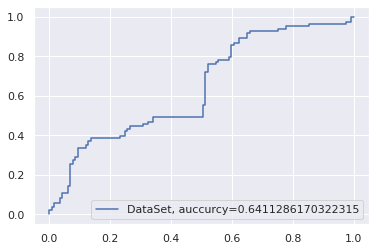

						 Result of Models Usig k_Nearest_Neighbors  Model : 
 
[[  1 116]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       117
           1       0.42      1.00      0.59        83

    accuracy                           0.42       200
   macro avg       0.71      0.50      0.30       200
weighted avg       0.76      0.42      0.25       200



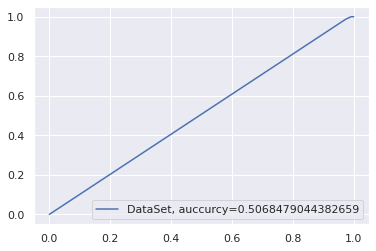

						 Result of Models Usig Decision_Trees Model : 
 
[[  4 113]
 [  7  76]]
              precision    recall  f1-score   support

           0       0.36      0.03      0.06       117
           1       0.40      0.92      0.56        83

    accuracy                           0.40       200
   macro avg       0.38      0.47      0.31       200
weighted avg       0.38      0.40      0.27       200



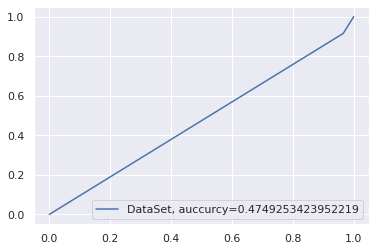

						 Result of Models Usig SVM Model : 
 
[[  0 117]
 [  0  83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.41      1.00      0.59        83

    accuracy                           0.41       200
   macro avg       0.21      0.50      0.29       200
weighted avg       0.17      0.41      0.24       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


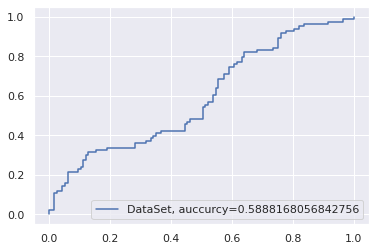

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


						 Result of Models Usig Naive_Bayes Model : 
 
[[  0 117]
 [  0  83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       117
           1       0.41      1.00      0.59        83

    accuracy                           0.41       200
   macro avg       0.21      0.50      0.29       200
weighted avg       0.17      0.41      0.24       200



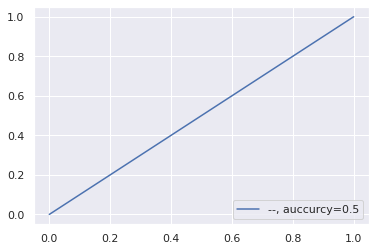

						 Result of Models Usig MinMaxScaler  Data : 
 
						 Result of Models Usig Logistic_Regression Model : 
 
[[58 59]
 [42 41]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       117
           1       0.41      0.49      0.45        83

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.51      0.49      0.50       200



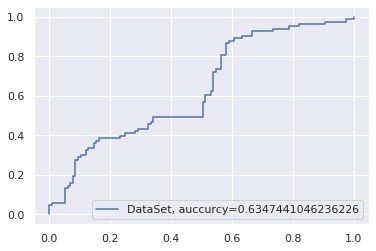

						 Result of Models Usig k_Nearest_Neighbors  Model : 
 
[[55 62]
 [29 54]]
              precision    recall  f1-score   support

           0       0.65      0.47      0.55       117
           1       0.47      0.65      0.54        83

    accuracy                           0.55       200
   macro avg       0.56      0.56      0.54       200
weighted avg       0.58      0.55      0.55       200



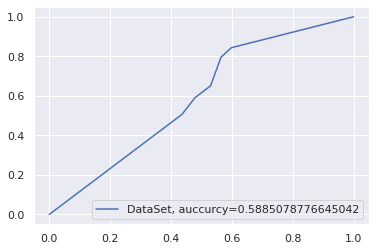

						 Result of Models Usig Decision_Trees Model : 
 
[[52 65]
 [37 46]]
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       117
           1       0.41      0.55      0.47        83

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.51      0.49      0.49       200



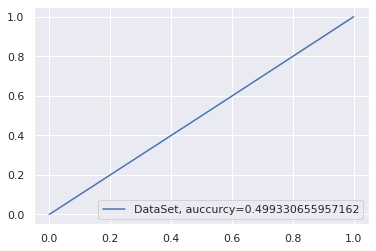

						 Result of Models Usig SVM Model : 
 
[[58 59]
 [42 41]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       117
           1       0.41      0.49      0.45        83

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.51      0.49      0.50       200



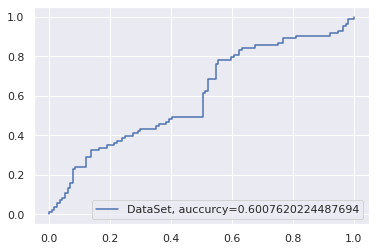

						 Result of Models Usig Naive_Bayes Model : 
 
[[58 59]
 [42 41]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.53       117
           1       0.41      0.49      0.45        83

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.51      0.49      0.50       200



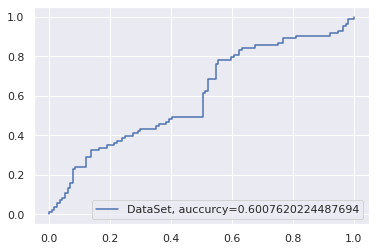

In [ ]:
def main():
  print("\t\t\t\t\t\t Loading Data : \n ")
  Class_Load =Load(DataPath_Train, DataPath_Validation)
  Train , Valid = Class_Load.Load_Data()
  print("\t\t\t\t\t\t Analysis Data : \n ")
  Class_Analysis= Analysis_Data(Train , Valid)
  Class_Analysis.Runall_Analysis()
  print("\t\t\t\t\t\t Missing Data : \n ")
  Class_Missing =Missing_Data(Train , Valid)
  Train , Valid  = Class_Missing.Runall_MissingData()
  print("\t\t\t\t\t\t Missing Data : \n ")

  Preprocessing_Class = Preprocessing_Data(Train,Valid)
  X_train ,y_train , X_test,y_test =Preprocessing_Class.Runall_Preprocessing_Data()

  ##########################################################
  print("\t\t\t\t\t\t Result of Models Usig Normalization Data : \n ")
  Class_Normalize= Normalize(X_train ,y_train , X_test,y_test)
  Nor_X_train =Class_Normalize.Normalization(X_train)
  Nor_X_test =Class_Normalize.Normalization(X_test)
  print("\t\t\t\t\t\t Result of Models Usig Logistic_Regression Model : \n ")
  Binary_Classification_Class=Binary_Classification( Nor_X_train ,y_train , Nor_X_test,y_test)
  Binary_Classification_Class.Logistic_Regression()
  print("\t\t\t\t\t\t Result of Models Usig k_Nearest_Neighbors  Model : \n ")

  Binary_Classification_Class.k_Nearest_Neighbors()
  print("\t\t\t\t\t\t Result of Models Usig Decision_Trees Model : \n ")
  Binary_Classification_Class.Decision_Trees()


  print("\t\t\t\t\t\t Result of Models Usig SVM Model : \n ")
  Binary_Classification_Class.SVM()

  print("\t\t\t\t\t\t Result of Models Usig Naive_Bayes Model : \n ")
  Binary_Classification_Class.Naive_Bayes()

  ###################################################### 
  print("\t\t\t\t\t\t Result of Models Usig MinMaxScaler  Data : \n ")
  Class_Normalize= Normalize(X_train ,y_train , X_test,y_test)
  MinMax_X_train =Class_Normalize.MinMaxScaler(X_train)
  MinMax_X_test =Class_Normalize.MinMaxScaler(X_test)
  print("\t\t\t\t\t\t Result of Models Usig Logistic_Regression Model : \n ")
  Binary_Classification_Class=Binary_Classification( MinMax_X_train ,y_train , MinMax_X_test,y_test)
  Binary_Classification_Class.Logistic_Regression()
  print("\t\t\t\t\t\t Result of Models Usig k_Nearest_Neighbors  Model : \n ")

  Binary_Classification_Class.k_Nearest_Neighbors()
  print("\t\t\t\t\t\t Result of Models Usig Decision_Trees Model : \n ")
  Binary_Classification_Class.Decision_Trees()


  print("\t\t\t\t\t\t Result of Models Usig SVM Model : \n ")
  Binary_Classification_Class.SVM()

  print("\t\t\t\t\t\t Result of Models Usig Naive_Bayes Model : \n ")
  Binary_Classification_Class.SVM()











if __name__ == "__main__":
    main()

# Use PCA TO INCREASE Accuracy 

						 Loading Data : 
 
						 Analysis Data : 
 
						 Train Head					 
    variable1  variable2  variable3  ... variable18 variable19 classLabel
0         a      17.92   0.000054  ...          t          0          0
1         b      16.92   0.000034  ...        NaN          0          0
2         b      31.25   0.000112  ...          t          0          0
3         a      48.17   0.000133  ...        NaN          0          0
4         b      32.33   0.000350  ...          f          0          0

[5 rows x 19 columns]
						 Train Tail					  
       variable1  variable2  variable3  ... variable18 variable19 classLabel
3695         a      18.75   0.000750  ...          t          1          1
3696         a      23.50   0.000900  ...          t          1          1
3697         b      34.17   0.000917  ...        NaN          1          1
3698         b      27.83   0.000154  ...        NaN          1          1
3699         a      36.75   0.000513  ...          f          1   

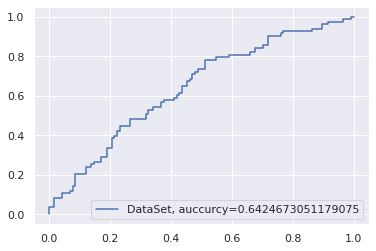

						 Result of Models Usig k_Nearest_Neighbors  Model : 
 
[[  9 108]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.14       117
           1       0.43      1.00      0.61        83

    accuracy                           0.46       200
   macro avg       0.72      0.54      0.37       200
weighted avg       0.77      0.46      0.33       200



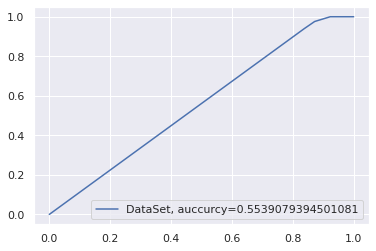

						 Result of Models Usig Decision_Trees Model : 
 
[[28 89]
 [ 8 75]]
              precision    recall  f1-score   support

           0       0.78      0.24      0.37       117
           1       0.46      0.90      0.61        83

    accuracy                           0.52       200
   macro avg       0.62      0.57      0.49       200
weighted avg       0.64      0.52      0.47       200



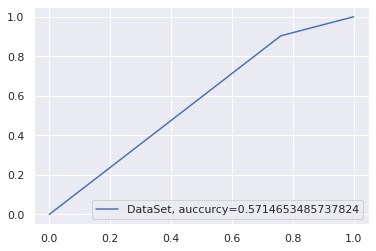

						 Result of Models Usig SVM Model : 
 
[[ 12 105]
 [  4  79]]
              precision    recall  f1-score   support

           0       0.75      0.10      0.18       117
           1       0.43      0.95      0.59        83

    accuracy                           0.46       200
   macro avg       0.59      0.53      0.39       200
weighted avg       0.62      0.46      0.35       200



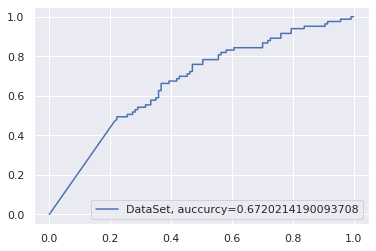

						 Result of Models Usig Naive_Bayes Model : 
 
[[  3 114]
 [  0  83]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       117
           1       0.42      1.00      0.59        83

    accuracy                           0.43       200
   macro avg       0.71      0.51      0.32       200
weighted avg       0.76      0.43      0.28       200



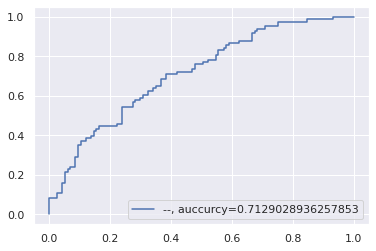

In [ ]:
def main():
  print("\t\t\t\t\t\t Loading Data : \n ")
  Class_Load =Load(DataPath_Train, DataPath_Validation)
  Train , Valid = Class_Load.Load_Data()
  print("\t\t\t\t\t\t Analysis Data : \n ")
  Class_Analysis= Analysis_Data(Train , Valid)
  Class_Analysis.Runall_Analysis()
  print("\t\t\t\t\t\t Missing Data : \n ")
  Class_Missing =Missing_Data(Train , Valid)
  Train , Valid  = Class_Missing.Runall_MissingData()
  print("\t\t\t\t\t\t Missing Data : \n ")

  Preprocessing_Class = Preprocessing_Data(Train,Valid)
  X_train ,y_train , X_test,y_test =Preprocessing_Class.Runall_Preprocessing_Data()

  ##########################################################
  print("\t\t\t\t\t\t Result of Models Usig PCA_Function Data : \n ")
  Class_Normalize= Normalize(X_train ,y_train , X_test,y_test)
  Nor_X_train =Class_Normalize.PCA_Function(X_train)
  Nor_X_test =Class_Normalize.PCA_Function(X_test)
  print("\t\t\t\t\t\t Result of Models Usig Logistic_Regression Model : \n ")
  Binary_Classification_Class=Binary_Classification( Nor_X_train ,y_train , Nor_X_test,y_test)
  Binary_Classification_Class.Logistic_Regression()
  print("\t\t\t\t\t\t Result of Models Usig k_Nearest_Neighbors  Model : \n ")

  Binary_Classification_Class.k_Nearest_Neighbors()
  print("\t\t\t\t\t\t Result of Models Usig Decision_Trees Model : \n ")
  Binary_Classification_Class.Decision_Trees()


  print("\t\t\t\t\t\t Result of Models Usig SVM Model : \n ")
  Binary_Classification_Class.SVM()

  print("\t\t\t\t\t\t Result of Models Usig Naive_Bayes Model : \n ")
  Binary_Classification_Class.Naive_Bayes()




  

if __name__ == "__main__":
    main()